<a href="https://colab.research.google.com/github/matthewpecsok/reuters/blob/main/reuters_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## reuters news articles analysis
## dnn with 2 hidden layers with various neurons
## multiclass classification

This notebook uses the IMBD dataset to model sentiment with movie reviews. It is a binary classification problem. The final val dataset accuracy is ~ 89% for the best model. In this model I attempted to set the hyperparameters with a parameter grid and wrote my own code for the implementation rather than relying on packages. 

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
import gc


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=10000)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
word_index = tf.keras.datasets.reuters.get_word_index()

In [ ]:
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [ ]:
word_index['midwest']

3893

In [ ]:
# why in the world it's indexed by word?
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [ ]:
reverse_word_index[4]

'in'

In [ ]:
reverse_word_index[1]

'the'

In [ ]:
min([max(sequence) for sequence in X_train])

341

In [ ]:
pd.DataFrame(X_train)

,0
0,"[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ..."
1,"[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,..."
2,"[1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,..."
3,"[1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46..."
4,"[1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2..."
...,...
8977,"[1, 313, 262, 2529, 1426, 8, 130, 40, 129, 363..."
8978,"[1, 4, 96, 5, 340, 3976, 23, 328, 6, 154, 7, 4..."
8979,"[1, 141, 3890, 387, 81, 8, 16, 1629, 10, 340, ..."
8980,"[1, 53, 46, 957, 26, 14, 74, 132, 26, 39, 46, ..."


In [ ]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

46 target labels

In [ ]:
df = pd.DataFrame(y_train,columns=['index'])#.groupby('index').agg('index')
print(df.value_counts('index').to_frame('counts'))
#print(df.value_counts('index')shape)



       counts
index        
3        3159
4        1949
19        549
16        444
1         432
11        390
20        269
13        172
8         139
10        124
9         101
21        100
25         92
2          74
18         66
24         62
0          55
34         50
12         49
36         49
6          48
28         48
30         45
23         41
31         39
17         39
40         36
32         32
41         30
14         26
39         24
26         24
43         21
15         20
37         19
38         19
29         19
45         18
5          17
7          16
27         15
22         15
42         13
44         12
33         11
35         10


In [ ]:
np.sum(y_train)/y_train.shape[0]

8.885103540414162

# encode fun

In [ ]:
def vector_seq(seq,dim=10000):
  res = np.zeros((len(seq),dim))
  for i, seq in enumerate(seq):
    res[i,seq] = 1.
  return(res)

# encode

In [ ]:
X_train = vector_seq(X_train)
X_test = vector_seq(X_test)
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
X_train.shape

(8982, 10000)

we have an array of 8982 rows and 10,000 columns. columns are words, rows are documents

In [ ]:
y_train.dtype

dtype('int64')

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test =  tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train.shape

(8982, 46)

# relu activation testing

In [ ]:
y_train.dtype

dtype('float32')

In [ ]:
type(y_train)

numpy.ndarray

# model building

## model function

In [ ]:
def model_create(param_grid,X_train,y_train,verbose):
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(param_grid['neurons'],activation=tf.keras.activations.relu,input_shape=(10000,)))
  model.add(tf.keras.layers.Dense(param_grid['neurons'],activation=tf.keras.activations.relu))
  model.add(tf.keras.layers.Dense(46,activation=tf.keras.activations.softmax))

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=param_grid['learning_rate']),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

  history = model.fit(X_train,y_train,validation_split=.2, epochs=10,verbose=verbose)
  return history,model,np.round(np.max(history.history['val_accuracy']),2)


## grid setups

In [ ]:
from sklearn.model_selection import ParameterSampler
from scipy.stats.distributions import expon
import numpy as np

## number of grid rows
grid_rows = 1

# this code generates far more 
# parameter options than needed
# so we use the parameter sampler to grab some  

rng = np.random.RandomState(0)
param_grid = {'neurons':np.linspace(1,1000,1000), 'learning_rate': np.linspace(0.001,0.1,50)}
param_list = list(ParameterSampler(param_grid, n_iter=grid_rows,
                                   random_state=rng))

param_list

[{'learning_rate': 0.0050408163265306125, 'neurons': 733.0}]

In [ ]:
model_output = pd.DataFrame()

In [ ]:
for i in param_list:
  history,model,val_acc = model_create(i,X_train,y_train,1)
  print(val_acc)
  new_row = dict()
  new_row = {'model':model,'history':history,'acc':val_acc}
  model_output = model_output.append(new_row,ignore_index=True)

model_output = model_output.join(pd.DataFrame(param_list))

model_output

Epoch 1/10
225/225 [==============================] - 20s 87ms/step - loss: 2.0309 - accuracy: 0.6055 - val_loss: 1.2327 - val_accuracy: 0.7468
Epoch 2/10
225/225 [==============================] - 19s 86ms/step - loss: 0.8590 - accuracy: 0.8206 - val_loss: 1.2737 - val_accuracy: 0.7858
Epoch 3/10
225/225 [==============================] - 19s 86ms/step - loss: 0.5170 - accuracy: 0.8886 - val_loss: 1.8502 - val_accuracy: 0.7796
Epoch 4/10
225/225 [==============================] - 19s 85ms/step - loss: 0.4133 - accuracy: 0.9138 - val_loss: 2.2893 - val_accuracy: 0.7807
Epoch 5/10
225/225 [==============================] - 19s 86ms/step - loss: 0.2953 - accuracy: 0.9417 - val_loss: 2.7264 - val_accuracy: 0.7613
Epoch 6/10
225/225 [==============================] - 19s 86ms/step - loss: 0.2784 - accuracy: 0.9527 - val_loss: 4.0874 - val_accuracy: 0.7652
Epoch 7/10
225/225 [==============================] - 19s 85ms/step - loss: 0.2755 - accuracy: 0.9519 - val_loss: 4.5056 - val_accuracy:

,acc,history,model,neurons,learning_rate
0,0.79,<tensorflow.python.keras.callbacks.History obj...,<tensorflow.python.keras.engine.sequential.Seq...,733.0,0.005041


In [ ]:
gc.collect()

In [ ]:
model_output

,acc,history,model,neurons,learning_rate
0,0.79,<tensorflow.python.keras.callbacks.History obj...,<tensorflow.python.keras.engine.sequential.Seq...,733.0,0.005041


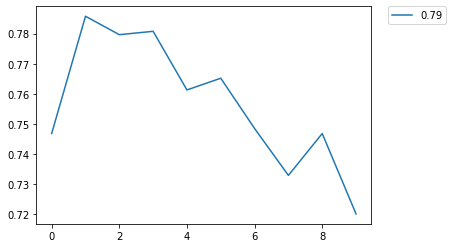

In [ ]:


for index, row in model_output[model_output['acc']>.75].iterrows():
  plt.plot(row['history'].history['val_accuracy'],label=row['acc'])
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)




In [ ]:
model_output[model_output['acc']>.55]

,acc,history,model,neurons,learning_rate
0,0.79,<tensorflow.python.keras.callbacks.History obj...,<tensorflow.python.keras.engine.sequential.Seq...,733.0,0.005041


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/reuters/reuters_multiclass_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/reuters/reuters_multiclass_model/assets
